<a href="https://colab.research.google.com/github/amikoshimrah/sothingshimrah/blob/main/Startup_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Load and Explore Data**

a) Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
file_path = '/content/drive/My Drive/Colab Notebooks/Assignment/50_Startups.csv'
df = pd.read_csv(file_path)
# Display basic info
print(df.head())


   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


In [ ]:
print(df.describe())

           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


**Inferences:**

The dataset contains attributes (R&D Spend, Administration, Marketing Spend ) and the startup Profit as the target variable.

All fields containts numerical values accept State (categorical)

No missing values were found, ensuring a clean dataset.


**Step 2: Data Visualization**

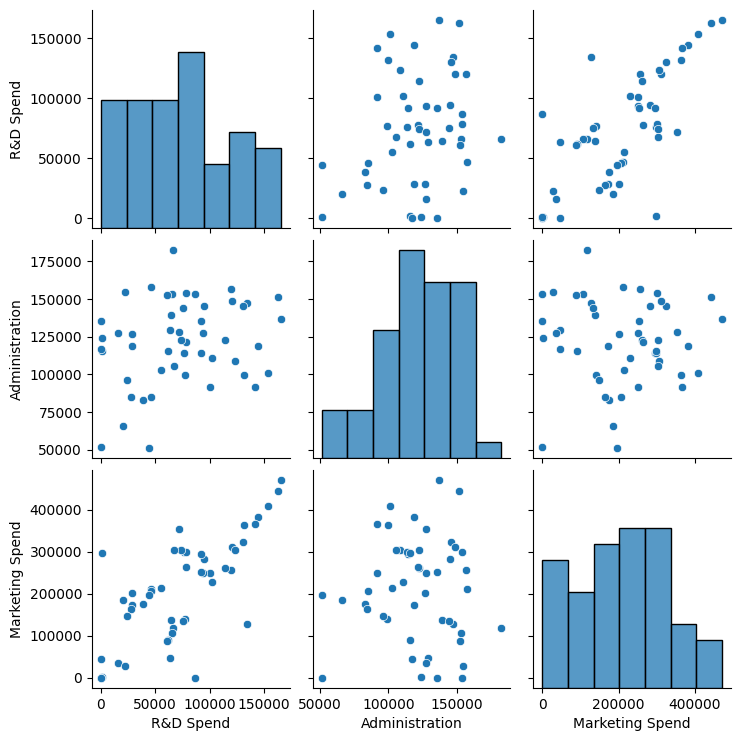

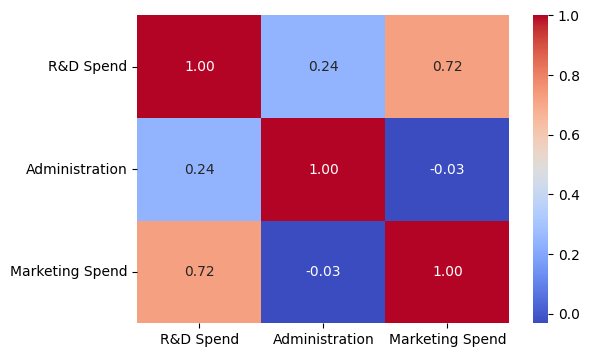

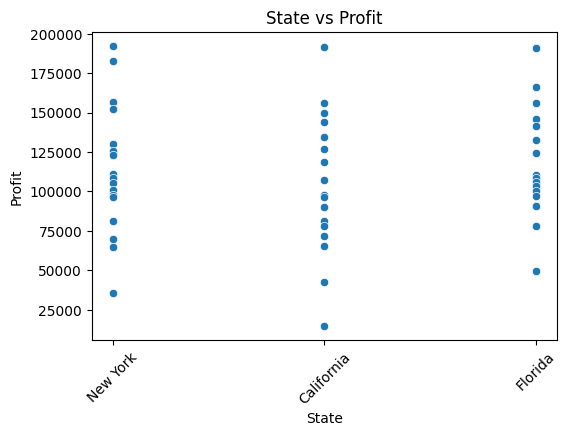

In [ ]:
# Pairplot to see relationships
# Select only the required columns
selected_columns = ["R&D Spend", "Administration", "Marketing Spend"]
df_selected = df[selected_columns]

# Pairplot to see relationships
sns.pairplot(df_selected)
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Scatterplot for State vs Profit
plt.figure(figsize=(6, 4))
sns.scatterplot(x="State", y="Profit", data=df)
plt.title("State vs Profit")
plt.xlabel("State")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.show()



Inferences:

R&D and Marketing have co-relation.

State does,'t seem any impact on profit

**3. Data Preprocessing**

a) Convert Categorical Variables Using One-Hot Encoding

In [ ]:
df = pd.get_dummies(df, columns=['State'], drop_first=True)


b) Define Independent (X) and Dependent (y) Variables

In [ ]:
X = df.drop(columns=['Profit'])  # Independent variables
y = df['Profit']  # Dependent variable


c) Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


d) Standardize Features

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**4. Build and Train Models**

a) Simple Linear Regression (Using R&D Spend)

In [ ]:
X_simple_train = X_train[:, 0].reshape(-1, 1)  # Selecting only 'R&D Spend'
X_simple_test = X_test[:, 0].reshape(-1, 1)

# Train model
simple_model = LinearRegression()
simple_model.fit(X_simple_train, y_train)

# Predictions
y_simple_pred = simple_model.predict(X_simple_test)


b) Multiple Linear Regression (Using All Features)

In [ ]:
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Predictions
y_multi_pred = multi_model.predict(X_test)


5. Model **Evaluation**

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name} Performance:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R²): {r2:.2f}")
    print("-" * 40)

# Evaluate models
evaluate_model(y_test, y_simple_pred, "Simple Linear Regression")
evaluate_model(y_test, y_multi_pred, "Multiple Linear Regression")


Simple Linear Regression Performance:
Mean Squared Error (MSE): 59510962.81
Mean Absolute Error (MAE): 6077.36
R-squared (R²): 0.93
----------------------------------------
Multiple Linear Regression Performance:
Mean Squared Error (MSE): 82010363.05
Mean Absolute Error (MAE): 6961.48
R-squared (R²): 0.90
----------------------------------------



**Inference from Model Performance:**

**Simple Linear Regression (SLR) vs. Multiple Linear Regression (MLR):**

SLR R² = 0.93 → The model explains 93% of the variance in Profit using a single independent variable.

MLR R² = 0.90 → The model explains 90% of the variance when using multiple independent variables.

Since SLR has a higher R², it suggests that one independent variable (likely R&D Spend) is already highly predictive of Profit.

**Mean Squared Error (MSE) & Mean Absolute Error (MAE):**

SLR (MSE = 59.5M, MAE = 6077.36) has lower errors than MLR (MSE = 82M, MAE = 6961.48).

This means adding more features in MLR did not improve accuracy significantly—it actually introduced more error.

**Possible Explanations:**

R&D Spend is the strongest predictor of Profit, making additional features (Marketing Spend, Administration, and State) less impactful.

Multicollinearity could be an issue in MLR, where independent variables might be correlated, reducing the model's effectiveness.

Overfitting risk in MLR—adding more variables without strong relationships to Profit may increase noise rather than improving predictions.

**Conclusion:**
SLR performs better with a single key feature (likely R&D Spend), making it a simpler and more effective model.

MLR may not add much value—some features might be redundant or less relevant.

**6. Residual Analysis**

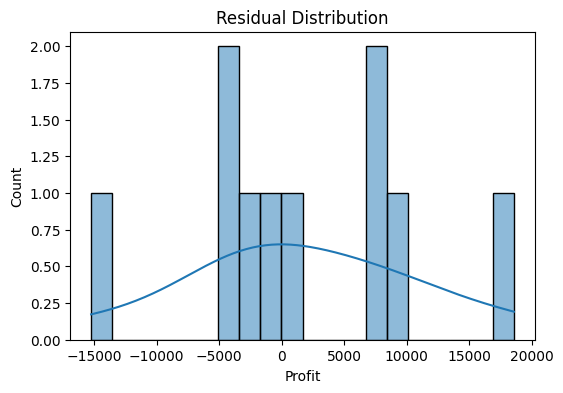

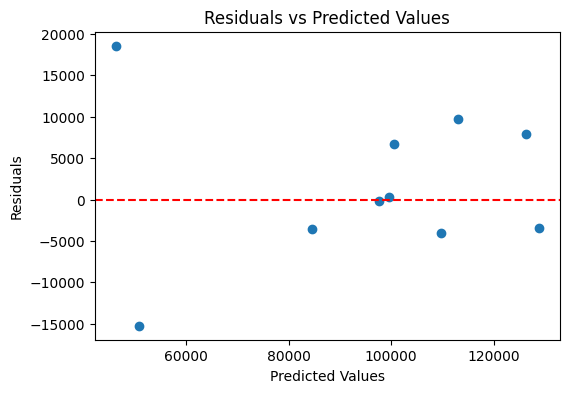

In [ ]:
# Residuals
residuals = y_test - y_multi_pred

# Histogram of residuals
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=20, kde=True)
plt.title("Residual Distribution")
plt.show()

# Scatter plot of residuals
plt.figure(figsize=(6,4))
plt.scatter(y_multi_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


**Conclusion from Residual Analysis:**

**1. Residual Distribution (Top Graph)**

Ideally, residuals should follow a normal distribution (bell-shaped curve).

However, this histogram appears irregular and scattered, indicating that:

The residuals do not follow a normal distribution.

There may be outliers or non-linearity in the data.

A transformation (log, square root, etc.) might help normalize residuals.

**2. Residuals vs. Predicted Values (Bottom Graph)**

Ideally, residuals should be randomly scattered around the red dashed zero line.

**Observations:**

The points are not evenly spread; some clusters and extreme values exist.

There is no clear funnel shape, meaning heteroscedasticity (variance change) is not severe, but some points deviate significantly.

Some large residuals suggest that the model struggles with certain predictions.

**Final Interpretation**

**Linearity:** May not be fully satisfied

**Homoscedasticity:** No clear funnel shape, but some large residuals → Slight variance inconsistency.

**Independence of Errors:** No strong trend, but outliers suggest further checks.

**Normality of Residuals:** Not normally distributed

**7. Model Optimization**

a) Feature Selection (Removing Highly Correlated Variables)

In [ ]:
# Check feature correlations
corr_matrix = df.corr()
print(corr_matrix['Profit'].sort_values(ascending=False))

# If any feature has very high correlation, retrained it

Profit             1.000000
R&D Spend          0.972900
Marketing Spend    0.747766
Administration     0.200717
State_Florida      0.116244
State_New York     0.031368
Name: Profit, dtype: float64


The weak feature Administration and state have minimal impact on profit. The correlation values for these features are weak, suggesting state-wise differences are negligible. so removed it.

b) Retrain Model After Feature Selection (if necessary)

In [ ]:
selected_features = ['R&D Spend', 'Marketing Spend']  # Example after correlation analysis
X_selected = df[selected_features]
X_train_sel, X_test_sel, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_sel = scaler.fit_transform(X_train_sel)
X_test_sel = scaler.transform(X_test_sel)

optimized_model = LinearRegression()
optimized_model.fit(X_train_sel, y_train)

y_optimized_pred = optimized_model.predict(X_test_sel)
evaluate_model(y_test, y_optimized_pred, "Optimized Model")


Optimized Model Performance:
Mean Squared Error (MSE): 67343832.59
Mean Absolute Error (MAE): 6469.18
R-squared (R²): 0.92
----------------------------------------


**Final Verdict:**

The optimized model is better than Multiple Linear Regression (MLR) and almost as good as Simple Linear Regression (SLR).

R&D Spend remains the most important predictor of Profit.